In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [3]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [4]:
#SkinThickness cannot be zero
df['SkinThickness'] = df['SkinThickness'].replace(0, df[df['SkinThickness'] != 0]['SkinThickness'].mean())

In [5]:
#BloodPressure cannot be zero
df['BloodPressure'] = df['BloodPressure'].replace(0, df[df['BloodPressure'] != 0]['BloodPressure'].mean())


In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.00000,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.00000,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.00000,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,29.15342,0.0,30.1,0.349,47.0


In [8]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379, -0.03351824, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.52985903, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.69530596, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087, -0.03351824, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -1.02619983, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 , -0.19896517, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
X.shape

(768, 8)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [13]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5093 - loss: 0.7035 - val_accuracy: 0.6429 - val_loss: 0.6411
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6363 - loss: 0.6702 - val_accuracy: 0.7078 - val_loss: 0.5915
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.6043 - val_accuracy: 0.7468 - val_loss: 0.5582
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.5891 - val_accuracy: 0.7597 - val_loss: 0.5336
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5601 - val_accuracy: 0.7922 - val_loss: 0.5164
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7369 - loss: 0.5327 - val_accuracy: 0.7922 - val_loss: 0.5034
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7475 - loss: 0.5195 - val_accuracy: 0.8052 - val_loss: 0.4954
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7528 - loss: 0.5121 - val_accuracy: 0.8052 - val_loss

In [15]:
#1.Select appropriate optimizer
#2.No.of nodes in a layer
#3.Select no.of hidden layers
#4.All in one model

In [16]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [17]:
import keras_tuner as kt

In [18]:
# hp=>hyperparameter
def build_model(hp):
  model=Sequential()
  model.add(Dense(32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [19]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)   #work like gridSearchCV()

In [20]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 07s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 41s


In [21]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [22]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7389 - loss: 0.5500 - val_accuracy: 0.7727 - val_loss: 0.5321
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7200 - loss: 0.5211 - val_accuracy: 0.7662 - val_loss: 0.5151
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7471 - loss: 0.5061 - val_accuracy: 0.7597 - val_loss: 0.5030
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7515 - loss: 0.5001 - val_accuracy: 0.7597 - val_loss: 0.4938
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7455 - loss: 0.5080 - val_accuracy: 0.7792 - val_loss: 0.4856
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7632 - loss: 0.4811 - val_accuracy: 0.7857 - val_loss: 0.4802
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7511 - loss: 0.4889 - val_accuracy: 0.7792 - val_loss: 0.4769
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7737 - loss: 0.4885 - val_accuracy: 0.

In [25]:
def build_model(hp):
  model=Sequential()
  units = hp.Int('units',min_value=8,max_value=128)
  # units = hp.Int('units',min_value=8,max_value=128,step=8)

  model.add(Dense(units=units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [26]:
tuner= kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='number_of_nodes')

In [27]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.701298713684082

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 11s


In [28]:
tuner.get_best_hyperparameters()[0].values

{'units': 120}

In [29]:
model = tuner.get_best_models(num_models=1)[0]

In [30]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7818 - loss: 0.4678 - val_accuracy: 0.8117 - val_loss: 0.4662
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.4503 - val_accuracy: 0.8052 - val_loss: 0.4651
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7778 - loss: 0.4581 - val_accuracy: 0.8052 - val_loss: 0.4644
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7744 - loss: 0.4597 - val_accuracy: 0.8052 - val_loss: 0.4644
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 0.4461 - val_accuracy: 0.7987 - val_loss: 0.4654
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.4715 - val_accuracy: 0.7922 - val_loss: 0.4633
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4491 - val_accuracy: 0.7987 - val_loss: 0.4636
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 0.4493 - val_accuracy: 0.79

In [31]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(48,activation='relu',input_dim=8))

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(48,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [32]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='number_of_layers')

In [33]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.8051947951316833

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 10s


In [34]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5}

In [35]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7721 - loss: 0.4801 - val_accuracy: 0.8117 - val_loss: 0.4741
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7740 - loss: 0.4822 - val_accuracy: 0.7792 - val_loss: 0.4853
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7940 - loss: 0.4438 - val_accuracy: 0.7922 - val_loss: 0.4705
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.3870 - val_accuracy: 0.8117 - val_loss: 0.4698
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4282 - val_accuracy: 0.7403 - val_loss: 0.5468
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7887 - loss: 0.4339 - val_accuracy: 0.7857 - val_loss: 0.4864
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.4147 - val_accuracy: 0.7987 - val_loss: 0.4814
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.4107 - val_accuracy: 0.79

In [37]:
def build_model(hp):
  model=Sequential()
  counter = 0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),input_dim=8))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))

    counter = counter+1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta']),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [38]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='all_in_one')

In [39]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7467532753944397

Best val_accuracy So Far: 0.7467532753944397
Total elapsed time: 00h 00m 11s


In [40]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 120,
 'activation0': 'sigmoid',
 'dropout0': 0.5,
 'optimizer': 'adam',
 'units1': 56,
 'activation1': 'relu'}

In [41]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6439 - loss: 0.6044 - val_accuracy: 0.7662 - val_loss: 0.5234
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.5757 - val_accuracy: 0.7532 - val_loss: 0.5129
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.5695 - val_accuracy: 0.7532 - val_loss: 0.5067
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.5688 - val_accuracy: 0.7532 - val_loss: 0.5009
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 0.5400 - val_accuracy: 0.7532 - val_loss: 0.4944
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 0.5455 - val_accuracy: 0.7597 - val_loss: 0.4899
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.5346 - val_accuracy: 0.7597 - val_loss: 0.4875
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7276 - loss: 0.5616 - val_accuracy: 0.77

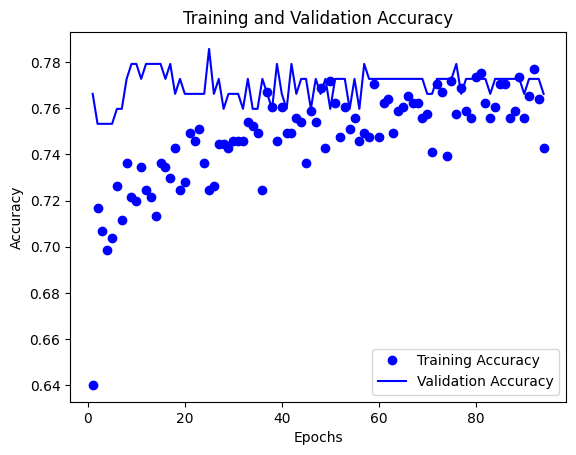

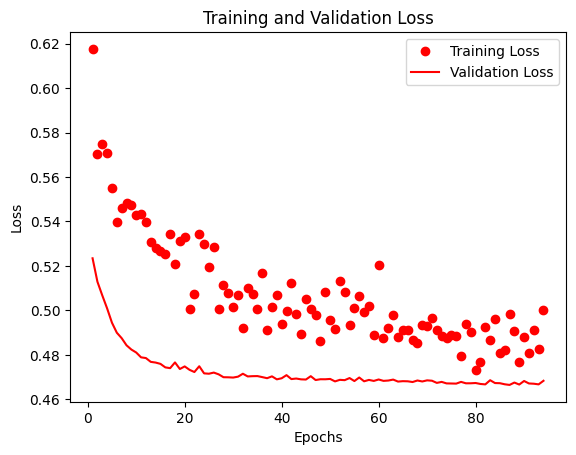

In [43]:

import matplotlib.pyplot as plt


accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plot accuracy
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()